# Metient-calibrate

### This tutorial is intended for those who want to run Metient in calibrate mode, where they already have the observed clone percentages and wish to label the clone tree. 

### To run this notebook, you'll need metient installed:

```bash
mamba create -n "met" python=3.8.8 ipython
mamba activate met
pip install metient
```

### Import libraries and setup paths

In [1]:
import os
from metient import metient as met

### Setup paths
# Path to where our input clone trees and tsvs are located
input_dir = os.path.join(os.getcwd(), "inputs")
# Path to save outputs
output_dir = os.path.join(os.getcwd(), "2_outputs")

CUDA GPU: False


### An example of the expected tsv file format for NSCLC patient CRUK0010
**The required columns are:**
`anatomical_site_index, anatomical_site_label, cluster_index, cluster_label, present, site_category, num_mutations` (see `../README.md` for description of each column)

In [2]:
import pandas as pd
df = pd.read_csv(os.path.join(input_dir, "CRUK0010_SNVs.tsv"), sep="\t")
df

,anatomical_site_index,anatomical_site_label,cluster_index,cluster_label,present,site_category,num_mutations
0,0,primary_SU_T1,0,SPTAN1;SETD2,0,primary,58
1,1,LN_SU_FLN1,0,SPTAN1;SETD2,0,metastasis,58
2,2,metachronousMet_BR_LN1,0,SPTAN1;SETD2,0,metastasis,58
3,3,metachronousMet_BR_LN2,0,SPTAN1;SETD2,0,metastasis,58
4,4,metachronousMet_BR_LN3,0,SPTAN1;SETD2,0,metastasis,58
...,...,...,...,...,...,...,...
70,0,primary_SU_T1,14,OTUD7B;BVES-AS1,0,primary,5
71,1,LN_SU_FLN1,14,OTUD7B;BVES-AS1,0,metastasis,5
72,2,metachronousMet_BR_LN1,14,OTUD7B;BVES-AS1,0,metastasis,5
73,3,metachronousMet_BR_LN2,14,OTUD7B;BVES-AS1,0,metastasis,5


## Step 1: Load filepaths to clone trees and tsv files for each patient

In [3]:
patients = ["CRUK0003", "CRUK0010", "CRUK0013", "CRUK0029", "CRUK0590"]

clone_tree_fns = [os.path.join(input_dir, f"{patient}_tree.txt") for patient in patients]
ref_var_fns = [os.path.join(input_dir, f"{patient}_SNVs.tsv") for patient in patients]

## Step 2: Run Metient-calibrate

  0%|          | 0/166 [00:00<?, ?it/s]

Saving results to /lila/data/morrisq/divyak/projects/metient/tutorial/2_outputs/calibrate
Overwriting existing directory at /lila/data/morrisq/divyak/projects/metient/tutorial/2_outputs/calibrate

*** Calibrating for patient: CRUK0003 ***
ordered_sites ['primary_SU_T1', 'LN_SU_FLN1']
calculate_batch_size 1664


 40%|███▉      | 66/166 [01:16<01:31,  1.09it/s]/lila/data/morrisq/divyak/projects/metient/metient/lib/vertex_labeling.py:708: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3614.)
  known_labelings.append(torch.eye(num_sites)[optimal_site].T)
100%|██████████| 166/166 [02:17<00:00,  1.20it/s]


pareto_metrics {(1, 1, 1)}
# final solutions: 1

*** Calibrating for patient: CRUK0010 ***
ordered_sites ['primary_SU_T1', 'LN_SU_FLN1', 'metachronousMet_BR_LN1', 'metachronousMet_BR_LN2', 'metachronousMet_BR_LN3']
calculate_batch_size 2524


100%|██████████| 166/166 [02:19<00:00,  1.19it/s]


pareto_metrics {(4, 4, 1)}


  0%|          | 0/166 [00:00<?, ?it/s]

# final solutions: 2

*** Calibrating for patient: CRUK0013 ***
ordered_sites ['LN_SU_LN1', 'LN_SU_LN2', 'primary_SU_T1', 'LN_SU_FLN1', 'LN_SU_FLN2']
calculate_batch_size 1724


100%|██████████| 166/166 [00:24<00:00,  6.78it/s]


pareto_metrics {(5, 4, 1), (4, 4, 2)}
# final solutions: 2


  1%|          | 1/166 [00:00<00:18,  8.86it/s]


*** Calibrating for patient: CRUK0029 ***
ordered_sites ['LN_SU_LN5', 'LN_SU_LN7', 'primary_SU_T1', 'LN_SU_FLN1', 'metachronousMet_BR_T1']
calculate_batch_size 2524


  0%|          | 0/166 [00:00<?, ?it/s]

pareto_metrics {(5, 4, 1), (4, 4, 2)}
# final solutions: 3

*** Calibrating for patient: CRUK0590 ***
ordered_sites ['primary_SU_T1', 'metachronousMet_BR_T1.FR2', 'metachronousMet_BR_T1.FR1', 'metachronousMet_BR_T3.FR1', 'LN_SU_FLN1']
calculate_batch_size 2924


100%|██████████| 166/166 [00:16<00:00, 10.13it/s]


pareto_metrics {(5, 4, 1), (4, 4, 2)}
# final solutions: 2
Calibrating to 3 patients
Early stopping after 807 epochs.
Optimized thetas: tensor([0.47, 0.32, 0.22], grad_fn=<DivBackward0>)
CRUK0003_primary_SU_T1
5 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

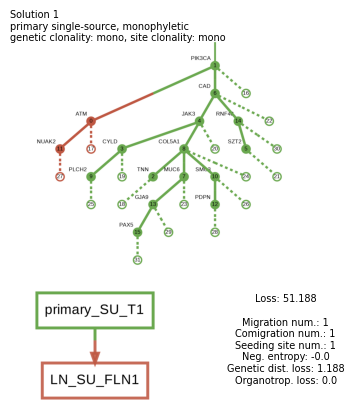

CRUK0010_primary_SU_T1
5 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

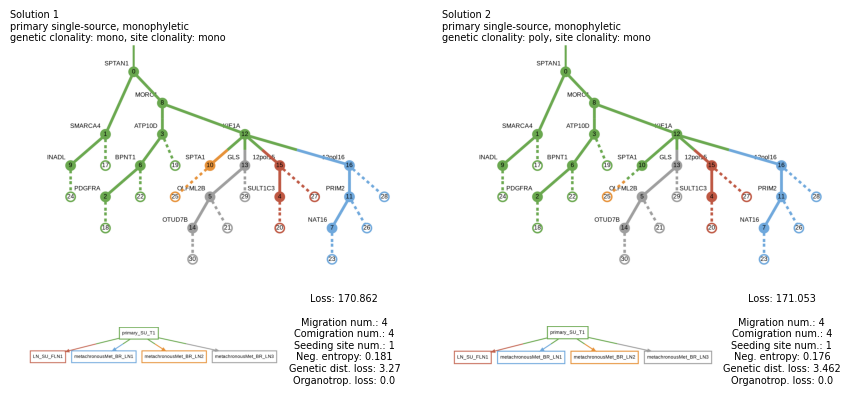

CRUK0013_primary_SU_T1
5 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

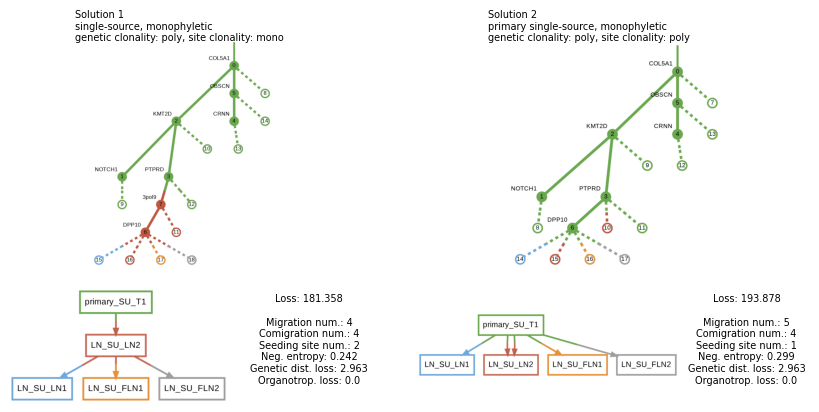

CRUK0029_primary_SU_T1
5 unique trees were not found (3 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

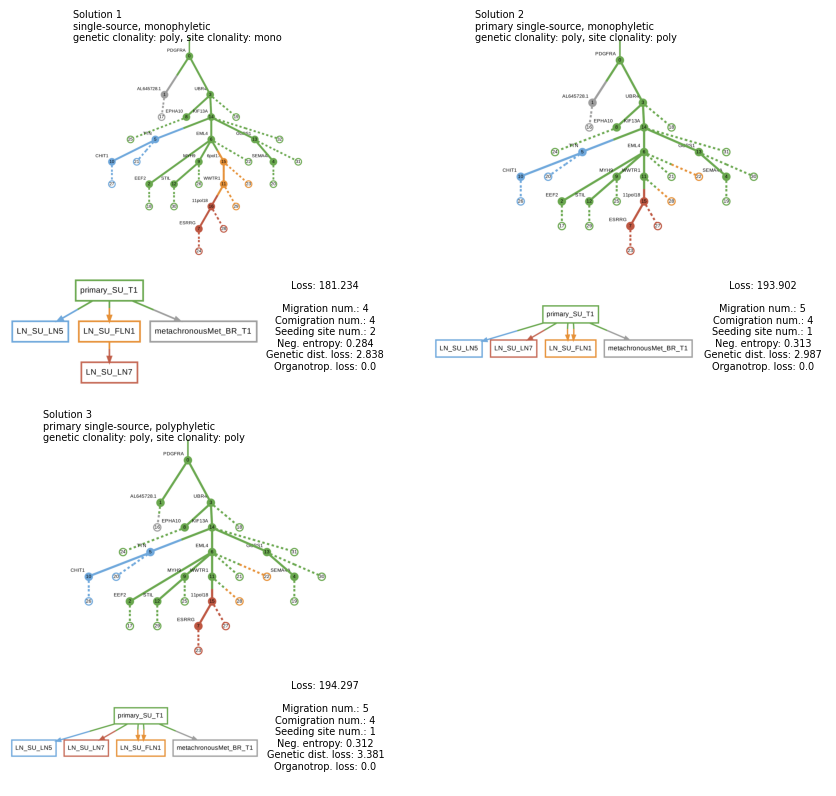

CRUK0590_primary_SU_T1
5 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

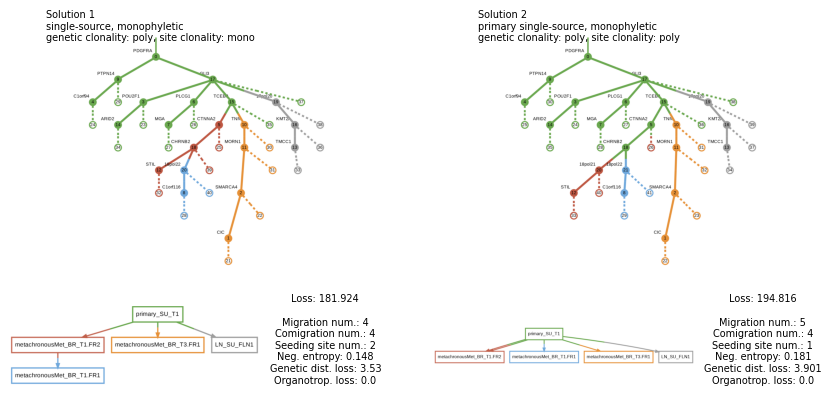

[0.4664594531059265, 0.317470908164978, 0.21606963872909546]

In [4]:
print_config = met.PrintConfig(visualize=True, verbose=False, k_best_trees=5)
met.calibrate_label_clone_tree(clone_tree_fns, ref_var_fns, print_config, 
                               output_dir, patients, solve_polytomies=True)


## Step 3: Use the pickle file outputs for downstream analysis

### In addition to the visualizations that Metient provides, we also save pkl.gz files for each Metient run that contain all the results of the run.

In [7]:
import gzip
import pickle

with gzip.open(os.path.join(output_dir,"calibrate", "CRUK0590_primary_SU_T1.pkl.gz") ,"rb") as f:
    pckl = pickle.load(f)
print(pckl.keys())

# V is the best ancestral labeling
V = pckl['clone_tree_labelings'][0]
# A is the adjacency matrix that is the input clone tree + inferred leaf nodes
A = pckl['full_adjacency_matrices'][0]

# G represents the migration graph
G = met.migration_graph(V, A)
print("\nmigration graph:\n", G)

# Show other information about this patient's inferred migration history
print("\nseeding pattern:", met.seeding_pattern(V, A))
print("seeding clusters:", met.seeding_clusters(V, A))
print("phyleticity:", met.phyleticity(V, A))
print("site clonality:", met.site_clonality(V, A))
print("genetic clonality:", met.genetic_clonality(V, A))

dict_keys(['clone_tree_labelings', 'losses', 'full_tree_node_idx_to_labels', 'full_adjacency_matrices', 'ordered_anatomical_sites', 'loss_dict', 'primary_site', 'soft_v', 'gen_dist_matrices', 'observed_clone_matrix'])

migration graph:
 tensor([[0., 1., 0., 1., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

seeding pattern: single-source
seeding clusters: [15, 17, 18]
phyleticity: monophyletic
site clonality: monoclonal
genetic clonality: polyclonal
